In [32]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Reading the file and checking it
df = pd.read_csv('AIDS_Classification_50000.csv')
df.head(5)

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0


# Exploratory Data analysis - EDA 
#### Explore, study and visualize data 

In [ ]:
# Bottom five data values
df.tail()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
49995,953,3,46,61.28204,0,0,0,90,0,1,...,1,3,0,1,1,234,402,481,1014,0
49996,1036,0,42,73.36768,0,1,0,100,0,1,...,1,3,0,0,1,369,575,514,657,0
49997,1157,0,40,78.75824,0,1,0,100,0,1,...,1,1,0,1,0,308,663,1581,863,0
49998,596,0,31,52.20371,0,0,0,100,0,1,...,1,1,0,1,1,349,440,470,865,1
49999,612,2,41,77.12100,0,1,0,90,0,1,...,1,3,0,1,0,428,396,1002,696,0


In [ ]:
df.shape

(50000, 23)

The shape of the dataset is 50,000 rows and 23 columns of variables.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   time      50000 non-null  int64  
 1   trt       50000 non-null  int64  
 2   age       50000 non-null  int64  
 3   wtkg      50000 non-null  float64
 4   hemo      50000 non-null  int64  
 5   homo      50000 non-null  int64  
 6   drugs     50000 non-null  int64  
 7   karnof    50000 non-null  int64  
 8   oprior    50000 non-null  int64  
 9   z30       50000 non-null  int64  
 10  preanti   50000 non-null  int64  
 11  race      50000 non-null  int64  
 12  gender    50000 non-null  int64  
 13  str2      50000 non-null  int64  
 14  strat     50000 non-null  int64  
 15  symptom   50000 non-null  int64  
 16  treat     50000 non-null  int64  
 17  offtrt    50000 non-null  int64  
 18  cd40      50000 non-null  int64  
 19  cd420     50000 non-null  int64  
 20  cd80      50000 non-null  in

We can find the dataset has no null values.
we can understand the variable datatypes through this.
No Object type variable is found.

In [ ]:
df.columns.to_list()

['time',
 'trt',
 'age',
 'wtkg',
 'hemo',
 'homo',
 'drugs',
 'karnof',
 'oprior',
 'z30',
 'preanti',
 'race',
 'gender',
 'str2',
 'strat',
 'symptom',
 'treat',
 'offtrt',
 'cd40',
 'cd420',
 'cd80',
 'cd820',
 'infected']

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,50000.0,877.369780,307.288688,66.00000,542.000000,1045.000000,1136.000000,1231.00000
trt,50000.0,1.384800,1.233272,0.00000,0.000000,1.000000,3.000000,3.00000
age,50000.0,34.164020,7.091152,12.00000,29.000000,34.000000,39.000000,68.00000
wtkg,50000.0,75.861991,12.028730,42.36162,68.253682,74.054115,81.142185,149.83087
hemo,50000.0,0.033480,0.179888,0.00000,0.000000,0.000000,0.000000,1.00000
homo,50000.0,0.653540,0.475847,0.00000,0.000000,1.000000,1.000000,1.00000
drugs,50000.0,0.132220,0.338733,0.00000,0.000000,0.000000,0.000000,1.00000
karnof,50000.0,96.831560,5.091788,76.00000,90.000000,100.000000,100.000000,100.00000
oprior,50000.0,0.042300,0.201275,0.00000,0.000000,0.000000,0.000000,1.00000
z30,50000.0,0.640880,0.479747,0.00000,0.000000,1.000000,1.000000,1.00000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.corr().style.background_gradient()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,preanti,race,gender,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
time,1.000000,0.051746,0.006911,0.039390,-0.019287,0.056241,-0.012310,0.021562,-0.021745,-0.074956,-0.056202,-0.041361,0.053726,-0.078147,-0.068901,-0.019133,0.068051,-0.101019,0.040720,0.089658,0.018400,0.026256,-0.102671
trt,0.051746,1.000000,0.040517,0.010247,0.002240,0.064000,-0.005980,-0.038132,-0.004581,-0.001674,0.001603,-0.067184,0.039346,0.000497,0.003392,-0.018105,0.232762,-0.027697,0.013352,0.028357,-0.004262,0.019198,-0.047112
age,0.006911,0.040517,1.000000,0.001856,-0.017836,0.108080,0.002495,-0.046430,0.011142,0.118811,0.093419,-0.075247,0.034213,0.121492,0.109482,0.001566,0.041837,-0.049142,-0.053918,-0.065441,0.005863,-0.001756,0.028718
wtkg,0.039390,0.010247,0.001856,1.000000,-0.034036,0.089131,-0.016851,0.008592,-0.004932,-0.106208,-0.066063,-0.045631,0.067468,-0.104913,-0.092254,0.004827,0.001226,-0.029979,0.047813,0.066893,0.019929,-0.006143,-0.055527
hemo,-0.019287,0.002240,-0.017836,-0.034036,1.000000,-0.068466,0.001203,-0.002599,0.013915,0.064002,0.043161,0.008795,-0.015268,0.062104,0.063511,-0.002698,0.008057,0.011043,-0.034345,-0.034451,-0.004844,-0.004207,0.026407
homo,0.056241,0.064000,0.108080,0.089131,-0.068466,1.000000,-0.051067,-0.011770,0.008095,-0.013145,0.014152,-0.178007,0.192607,-0.010187,0.010497,0.022002,0.072673,-0.103003,0.000200,-0.010264,0.025367,-0.004070,-0.007341
drugs,-0.012310,-0.005980,0.002495,-0.016851,0.001203,-0.051067,1.000000,0.010188,-0.010457,-0.033090,-0.034399,0.047854,-0.025554,-0.040928,-0.045483,0.000906,-0.009026,0.037158,0.025400,0.027702,-0.005788,0.006794,-0.025684
karnof,0.021562,-0.038132,-0.046430,0.008592,-0.002599,-0.011770,0.010188,1.000000,0.000356,-0.131726,-0.090110,0.034598,-0.002476,-0.136562,-0.130202,0.008108,-0.053328,-0.025224,0.045776,0.062692,0.023325,0.013964,-0.025860
oprior,-0.021745,-0.004581,0.011142,-0.004932,0.013915,0.008095,-0.010457,0.000356,1.000000,0.058107,0.046862,-0.018406,0.002859,0.065423,0.070862,0.017419,-0.011640,-0.008963,-0.041128,-0.042355,0.006786,-0.010503,0.043416
z30,-0.074956,-0.001674,0.118811,-0.106208,0.064002,-0.013145,-0.033090,-0.131726,0.058107,1.000000,0.425415,-0.092531,-0.024403,0.605567,0.573218,0.022249,0.010907,-0.007565,-0.217151,-0.284487,-0.018809,0.001278,0.238531


# Data visualization

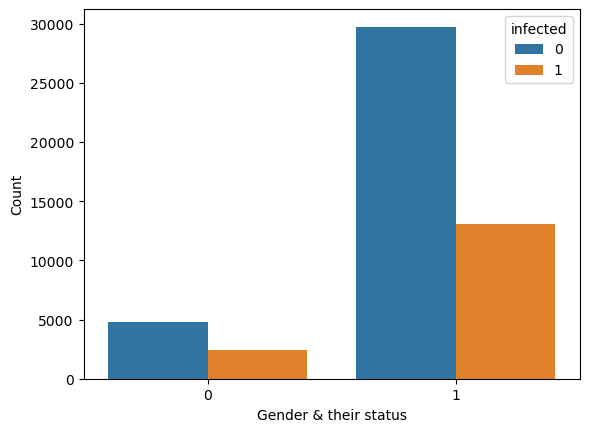

In [ ]:
sns.countplot(df,x='gender',hue='infected')
plt.xlabel("Gender & their status")
plt.ylabel("Count")
plt.show()

In [ ]:
# Calculate total number of people by gender
total_by_gender = df['gender'].value_counts()

# Calculate number of infected people by gender
infected_by_gender = df[df['infected'] == True]['gender'].value_counts()

# Calculate percentage of infected people by gender
percentage_infected_by_gender = (infected_by_gender / total_by_gender) * 100

print(percentage_infected_by_gender)

gender
1    30.594140
0    33.510119
Name: count, dtype: float64


Gender based infection distribution is 30% - Male & 33% - Female

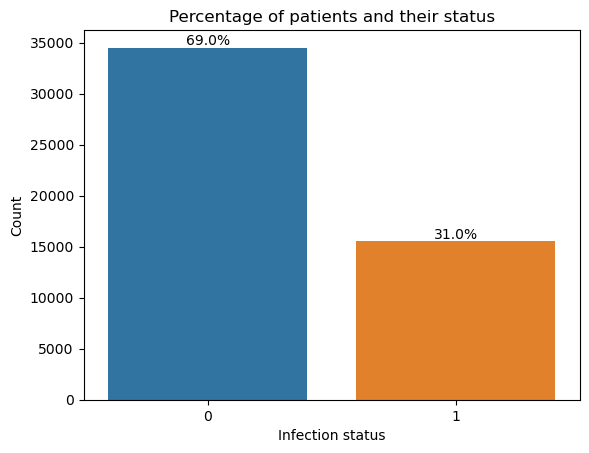

In [ ]:
ax =sns.countplot(df,x='infected')
total = df['infected'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:.1f}%')
plt.title('Percentage of patients and their status')
plt.xlabel("Infection status")
plt.ylabel("Count")
plt.show()

We could see that dataset is imbalanced. Infected column consists of categorical of 0 & 1.
'0' is 69% registered and '1' is 31% registered.

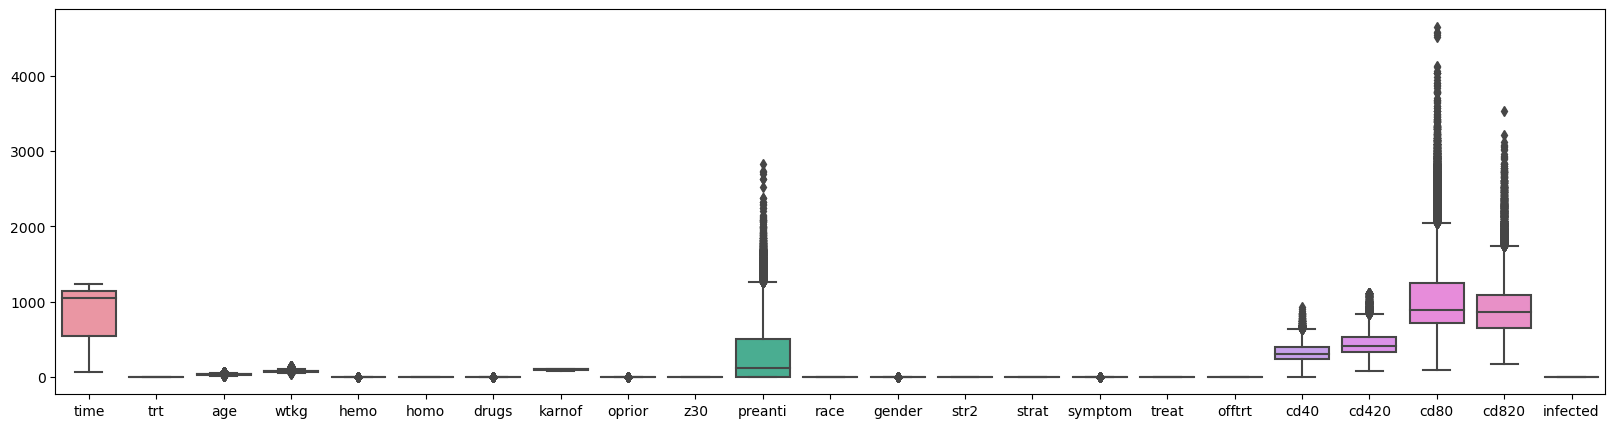

In [ ]:
# Box plot
plt.figure(figsize=(20,5))
sns.boxplot(df)
plt.show()

## Model preparation

In [18]:
# Before sampling
X = df.drop(['infected'], axis='columns')
y = df['infected']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=5)

In [21]:
# Importing standard scler and Scaling the data

ss = StandardScaler()
X_train.iloc[:,:] = ss.fit_transform(X_train.iloc[:,:])
X_test.iloc[:,:] = ss.transform(X_test.iloc[:,:])

In [22]:
lr = LogisticRegression()
log_reg = lr.fit(X_train,y_train)

In [24]:
y_train_pred = log_reg.predict(X_train)

In [26]:
log_reg.coef_

array([[-0.15869112, -0.07047829, -0.02918593, -0.04290289,  0.00148042,
         0.01228369, -0.04404677,  0.02519291,  0.04152064,  0.23937162,
         0.03263123,  0.01731776, -0.02547234,  0.16409076,  0.22877107,
         0.03799317, -0.1003321 , -0.08013588, -0.15019194, -0.21352946,
        -0.0044625 , -0.02990675]])

In [27]:
log_reg.intercept_

array([-0.90986136])

In [28]:
# Model score 

model_score = lr.score(X_train,y_train)
model_score

0.7072285714285714

In [29]:
# Y train probability
y_train_prob = lr.predict_proba(X_train)

# Y train predict 
y_train_pred = lr.predict(X_train)

# Y test probability
y_test_prob = lr.predict_proba(X_test)

# Y test predict
y_test_pred = lr.predict(X_test)

#  Confusion Matrix

In [31]:
# Accuracy score for test data
metrics.accuracy_score(y_test,y_test_pred)

0.7077333333333333

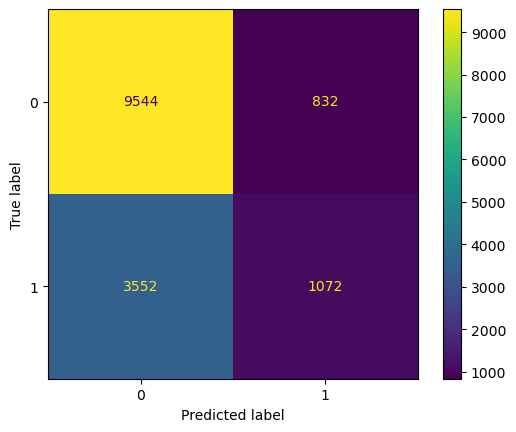

In [33]:
cm = confusion_matrix(y_test,y_test_pred)

dip = ConfusionMatrixDisplay(confusion_matrix=cm)
dip.plot()
plt.show()

In [35]:
from sklearn.ensemble import BalancedRandomForestClassifier

# Create a BalancedRandomForest classifier
clf = BalancedRandomForestClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))


ImportError: cannot import name 'BalancedRandomForestClassifier' from 'sklearn.ensemble' (c:\ProgramData\anaconda3\anaconda4\Lib\site-packages\sklearn\ensemble\__init__.py)